In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2
import string
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

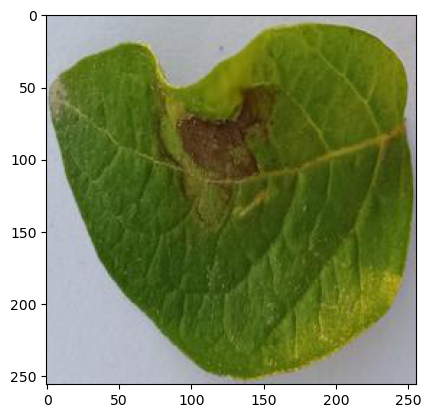

In [49]:
img = image.load_img("C:/Users/vivas/Downloads/data/Training/Late_Blight/Late_Blight_99.jpg")
plt.imshow(img)

In [48]:
cv2.imread("C:/Users/vivas/Downloads/data/Training/Late_Blight/Late_Blight_99.jpg").shape

(256, 256, 3)

In [12]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [16]:
tain_dataset = train.flow_from_directory('C:/Users/vivas/Downloads/data/Training', target_size=(256, 256), batch_size = 100, class_mode = 'categorical')
validation_dataset = train.flow_from_directory('C:/Users/vivas/Downloads/data/Testing', target_size=(256, 256), batch_size = 100, class_mode = 'categorical')

Found 3251 images belonging to 3 classes.
Found 405 images belonging to 3 classes.


In [25]:
tain_dataset.class_indices

{'Early_Blight': 0, 'Healthy': 1, 'Late_Blight': 2}

In [73]:
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation = 'softmax'))

In [74]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_41 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 230400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │    14,745,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,802,179 (56.47 MB)

 Trainable params: 14,802,179 (56.47 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [79]:
model_fit = model.fit(tain_dataset, batch_size=64, epochs = 30, validation_data = validation_dataset)

Epoch 1/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.5069 - loss: 1.0095 - val_accuracy: 0.5037 - val_loss: 1.0343
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.5519 - loss: 0.9694 - val_accuracy: 0.6716 - val_loss: 0.8311
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.6900 - loss: 0.7627 - val_accuracy: 0.7185 - val_loss: 0.7315
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.7386 - loss: 0.6691 - val_accuracy: 0.6444 - val_loss: 0.8031
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.7688 - loss: 0.6049 - val_accuracy: 0.7926 - val_loss: 0.5203
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8020 - loss: 0.5055 - val_accuracy: 0.6568 - val_loss: 0.7409
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.8053 - loss: 0.4633 - val_accuracy: 0.8049 - val_loss: 0.5157
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8563 - loss: 0.3968 - val_accuracy: 0.7877 - val_loss:

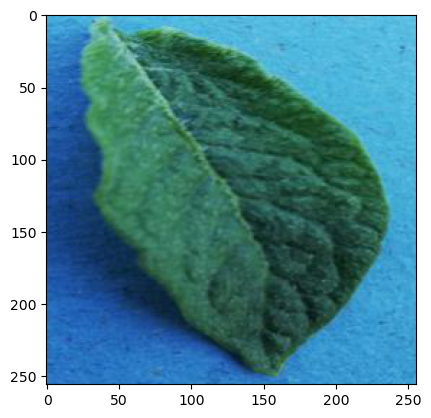

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[0. 1. 0.]]


In [91]:
dir_path = 'C:/Users/vivas/Downloads/data/Testing/Healthy'

img = image.load_img(dir_path + '//' + 'Healthy_99.jpg')
plt.imshow(img)
plt.show()
X = image.img_to_array(img)
X = np.expand_dims(X, axis = 0)

images = np.vstack([X])
val = model.predict(images)
print(val)